# Training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Load the dataset
data = pd.read_csv('/Users/shikarichacha/Desktop/PROJECT /1.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Perform label encoding
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
label_encoder
data['sex']

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

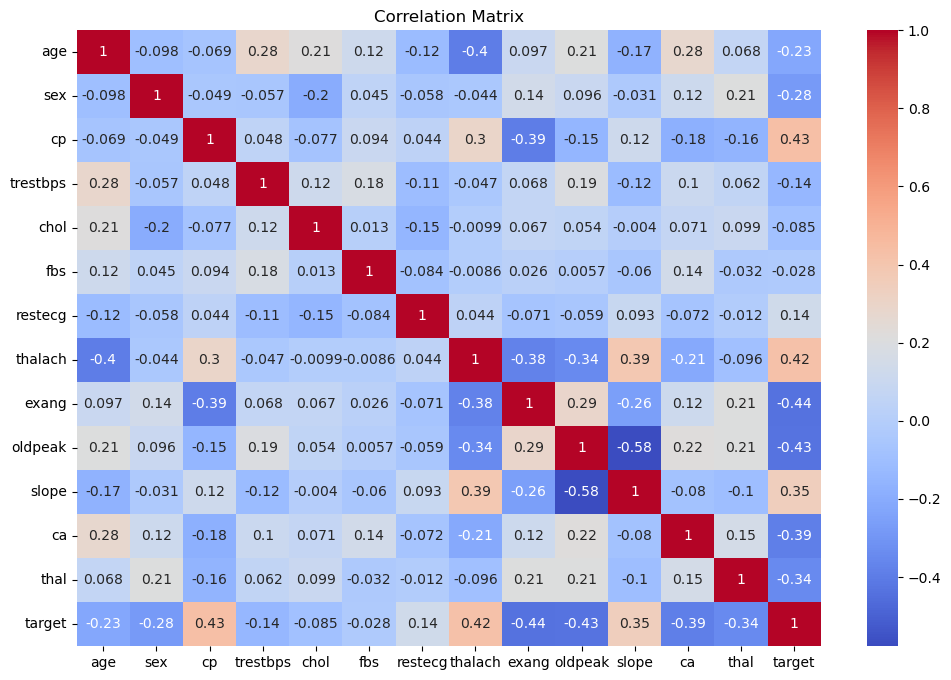

In [4]:
# Check correlation
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Split dataset into input features and target variable
X = data.drop('target', axis=1)
y = data['target']
X,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [6]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
X_test
y_test
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [7]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test


array([[ 2.76218225e-01,  7.22504380e-01, -9.71890936e-01,
         1.16949120e+00,  5.53408401e-01, -3.83300706e-01,
        -1.04610909e+00, -1.70875171e+00,  1.47790748e+00,
        -3.75556294e-01, -6.94988026e-01,  3.21860343e-01,
        -2.19657581e+00],
       [ 4.93953764e-01,  7.22504380e-01,  1.96807914e+00,
         2.36038903e+00,  7.81171723e-01, -3.83300706e-01,
        -1.04610909e+00,  3.98288831e-01, -6.76632341e-01,
        -7.39094787e-01, -6.94988026e-01, -6.89700735e-01,
         1.17848036e+00],
       [ 2.76218225e-01,  7.22504380e-01,  9.88089118e-01,
         1.16949120e+00, -2.29363312e+00,  2.60891771e+00,
         8.43132697e-01,  1.02591793e+00, -6.76632341e-01,
        -7.39094787e-01,  9.53905134e-01,  3.21860343e-01,
         1.17848036e+00],
       [ 1.67350456e-01, -1.38407465e+00, -9.71890936e-01,
         2.16772932e-01,  3.07778522e+00, -3.83300706e-01,
        -1.04610909e+00, -5.18701733e-03,  1.47790748e+00,
         8.05943807e-01, -6.94988026e

In [8]:
# Build the ANN model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model

In [9]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=1)
history

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7639 - accuracy: 0.4628 - val_loss: 0.6857 - val_accuracy: 0.5738
Epoch 2/100
25/25 [==============================] - 0s 758us/step - loss: 0.7122 - accuracy: 0.5331 - val_loss: 0.6469 - val_accuracy: 0.6230
Epoch 3/100
25/25 [==============================] - 0s 710us/step - loss: 0.6727 - accuracy: 0.6116 - val_loss: 0.6199 - val_accuracy: 0.6557
Epoch 4/100
25/25 [==============================] - 0s 697us/step - loss: 0.6415 - accuracy: 0.6612 - val_loss: 0.5914 - val_accuracy: 0.7049
Epoch 5/100
25/25 [==============================] - 0s 707us/step - loss: 0.6133 - accuracy: 0.7025 - val_loss: 0.5632 - val_accuracy: 0.7705
Epoch 6/100
25/25 [==============================] - 0s 717us/step - loss: 0.5849 - accuracy: 0.7314 - val_loss: 0.5335 - val_accuracy: 0.7869
Epoch 7/100
25/25 [==============================] - 0s 721us/step - loss: 0.5533 - accuracy: 0.7479 - val_loss: 0.5086 - val_accuracy: 0.7869
E

Epoch 58/100
25/25 [==============================] - 0s 762us/step - loss: 0.2102 - accuracy: 0.9215 - val_loss: 0.4693 - val_accuracy: 0.8689
Epoch 59/100
25/25 [==============================] - 0s 760us/step - loss: 0.2080 - accuracy: 0.9215 - val_loss: 0.4699 - val_accuracy: 0.8689
Epoch 60/100
25/25 [==============================] - 0s 729us/step - loss: 0.2072 - accuracy: 0.9215 - val_loss: 0.4728 - val_accuracy: 0.8689
Epoch 61/100
25/25 [==============================] - 0s 720us/step - loss: 0.2042 - accuracy: 0.9215 - val_loss: 0.4743 - val_accuracy: 0.8689
Epoch 62/100
25/25 [==============================] - 0s 712us/step - loss: 0.2022 - accuracy: 0.9215 - val_loss: 0.4751 - val_accuracy: 0.8689
Epoch 63/100
25/25 [==============================] - 0s 693us/step - loss: 0.2013 - accuracy: 0.9215 - val_loss: 0.4739 - val_accuracy: 0.8689
Epoch 64/100
25/25 [==============================] - 0s 715us/step - loss: 0.1981 - accuracy: 0.9256 - val_loss: 0.4762 - val_accuracy:

In [11]:
# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)


2/2 [==============================] - 0s 1ms/step - loss: 0.5941 - accuracy: 0.8689
Accuracy: 0.868852436542511


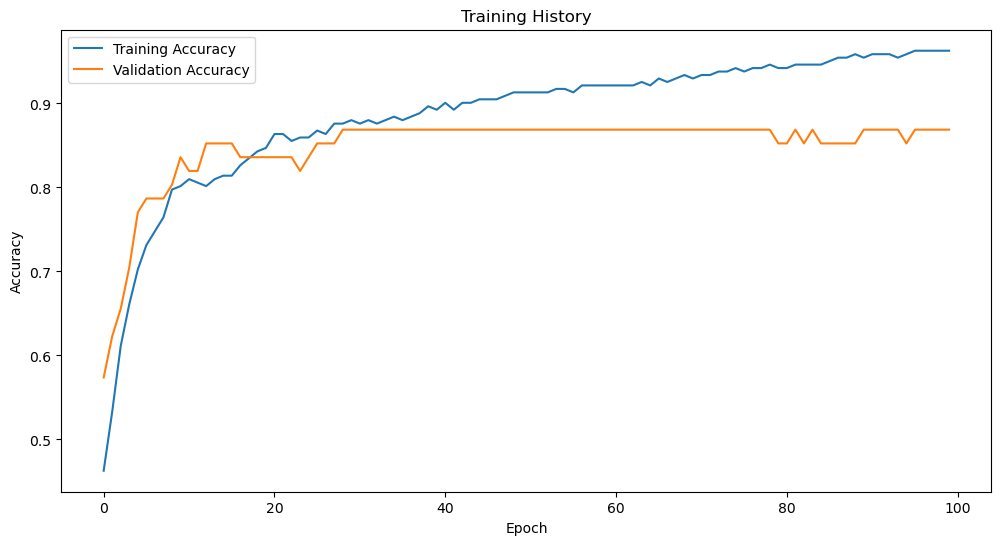

In [12]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Testing

In [18]:
import pandas as pd
from keras.models import load_model

# Load the saved model
loaded_model = load_model('heart_disease_ann_model.h5')

load_model


<function keras.src.saving.saving_api.load_model(filepath, custom_objects=None, compile=True, safe_mode=True, **kwargs)>

In [15]:
# we make patient_data 
new_patient_data = {
    'age': 65,
    'sex': 1,
    'cp': 3,
    'trestbps': 150,
    'chol': 120,
    'fbs': 0,
    'restecg': 1,
    'thalach': 140,
    'exang': 0,
    'oldpeak': 2.5,
    'slope': 1,
    'ca': 3,
    'thal': 2
}


In [16]:
import numpy as np

# Preprocess the new patient data
new_patient_df = pd.DataFrame(new_patient_data, index=[0])

# Scale the new patient data
scaled_new_patient = scaler.transform(new_patient_df.values)
# Make a prediction for the new patient
severity_prediction = loaded_model.predict(scaled_new_patient)[0][0]

# Convert the prediction to a severity label
severity_label = 'Severe' if severity_prediction > 0.5 else 'Not Severe'

print(f"The predicted severity of heart disease for the new patient is: {severity_label}")


1/1 [==============================] - 0s 43ms/step
The predicted severity of heart disease for the new patient is: Not Severe


/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Basic UI

In [17]:
import ipywidgets as widgets
from IPython.display import display
from keras.models import load_model

# Create input widgets for patient data
age = widgets.IntText(description='Age:', min=0, max=120)
sex = widgets.Dropdown(description='Sex:', options=[('Male', 1), ('Female', 0)])
cp = widgets.IntText(description='Chest Pain Type (CP):', min=0, max=3)
trestbps = widgets.IntText(description='Resting Blood Pressure (mm Hg):', min=0)
chol = widgets.IntText(description='Serum Cholesterol (mg/dl):', min=0)
fbs = widgets.Dropdown(description='Fasting Blood Sugar > 120 mg/dl (FBS):', options=[('Yes', 1), ('No', 0)])
restecg = widgets.IntText(description='Resting Electrocardiographic Results (RestECG):', min=0, max=2)
thalach = widgets.IntText(description='Maximum Heart Rate Achieved (Thalach):', min=0)
exang = widgets.Dropdown(description='Exercise Induced Angina (ExAng):', options=[('Yes', 1), ('No', 0)])
oldpeak = widgets.FloatText(description='ST Depression Induced by Exercise Relative to Rest (OldPeak):', min=0.0)
slope = widgets.IntText(description='Slope of the Peak Exercise ST Segment (Slope):', min=0, max=2)
ca = widgets.IntText(description='Number of Major Vessels (0-3) Colored by Flourosopy (CA):', min=0, max=3)
thal = widgets.IntText(description='Thalassemia (Thal):', min=0, max=3)

# Create a dropdown widget for selecting disease options
disease_options = ['Heart Disease', 'No Heart Disease']
disease = widgets.Dropdown(description='Disease:', options=disease_options)

# Create a button widget for triggering the prediction
predict_button = widgets.Button(description='Predict')

# Create an output widget for displaying the prediction result
prediction_output = widgets.Output()

# Create a file upload widget for uploading the model file
upload_model_button = widgets.FileUpload(description='Upload Model')

# Define a function to load the model
def load_model_file(change):
    uploaded_filename = next(iter(upload_model_button.value))
    with open(uploaded_filename, 'wb') as f:
        f.write(upload_model_button.value[uploaded_filename]['content'])
    global loaded_model
    loaded_model = load_model(uploaded_filename)


# Bind the load_model_file function to the file upload event
upload_model_button.observe(load_model_file, names='value')

# Define a function to make the prediction
def predict_patient_data(button):
    # Get the input values
    patient_data = {
        'age': age.value,
        'sex': sex.value,
        'cp': cp.value,
        'trestbps': trestbps.value,
        'chol': chol.value,
        'fbs': fbs.value,
        'restecg': restecg.value,
        'thalach': thalach.value,
        'exang': exang.value,
        'oldpeak': oldpeak.value,
        'slope': slope.value,
        'ca': ca.value,
        'thal': thal.value
    }
    
    # Perform any necessary preprocessing
    
    # Make the prediction
    # Replace this with your actual prediction logic using the loaded model
    predicted_class = 'Heart Disease' if patient_data['age'] > 50 else 'No Heart Disease'
    
    # Display the prediction result
    with prediction_output:
        prediction_output.clear_output()
        print(f'Predicted Disease: {predicted_class}')

# Bind the predict_patient_data function to the button click event
predict_button.on_click(predict_patient_data)

# Display the widgets
widgets.VBox([upload_model_button, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, disease, predict_button, prediction_output])
